In [39]:
from sklearn.manifold import TSNE
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap


In [3]:
data = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)

pixel_data, targets = data
print(targets)
targets = targets.astype(int) # convert targets from df to int





0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [4]:
print("Shape of Pixel data : {}".format(pixel_data.shape))
print(pixel_data.head())

Shape of Pixel data : (70000, 784)
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixe

In [5]:
# Scale data
norm_pixel_data =  StandardScaler().fit_transform(pixel_data)


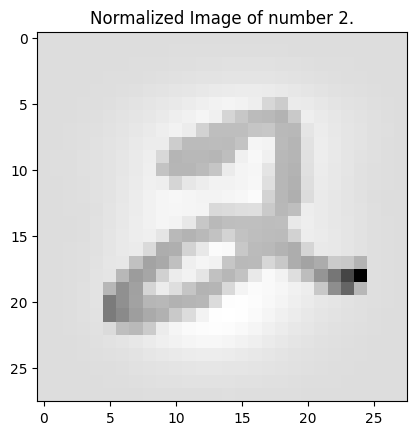

In [6]:
n=5
img = norm_pixel_data[5, :].reshape(28,28)

plt.imshow(img, cmap="binary")
plt.title(f"Normalized Image of number {targets[5]}.")
plt.show()

In [7]:
X_subset = norm_pixel_data[:3000] 
y_subset = targets[:3000]

In [34]:
perplexity = np.arange(5, 60, 10) # np.arange(5, 100, 10)
print(len(perplexity))
divergence = []
TSNE_results = []
iter = 0
for i in perplexity:
	iter+=1
	print(f"Iteration: {iter}")
	tsne = TSNE(n_components=2,perplexity=i, max_iter=1000) # max_iter=5000
	X_tsne = tsne.fit_transform(X_subset)
	
	TSNE_results.append(X_tsne)
	divergence.append(tsne.kl_divergence_)
	
	# # Uncomment this code to see the scatterplots for each iteration as individual plots.
	# fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y_subset)
	# fig.update_layout(
	# 	title=f"t-SNE with perplexity {i}",
	# 	xaxis_title="First t-SNE",
	# 	yaxis_title="Second t-SNE",
	# )
	# fig.show()



6
Iteration: 1


Iteration: 2


Iteration: 3


Iteration: 4


Iteration: 5


Iteration: 6


In [42]:
fig=px.line(x=perplexity, y=divergence, markers=True, width=800, height=500)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)


[[0.65098039 0.80784314 0.89019608 1.        ]
 [0.12156863 0.47058824 0.70588235 1.        ]
 [0.69803922 0.8745098  0.54117647 1.        ]
 [0.2        0.62745098 0.17254902 1.        ]
 [0.98431373 0.60392157 0.6        1.        ]
 [0.89019608 0.10196078 0.10980392 1.        ]
 [0.99215686 0.74901961 0.43529412 1.        ]
 [1.         0.49803922 0.         1.        ]
 [0.79215686 0.69803922 0.83921569 1.        ]
 [0.41568627 0.23921569 0.60392157 1.        ]]


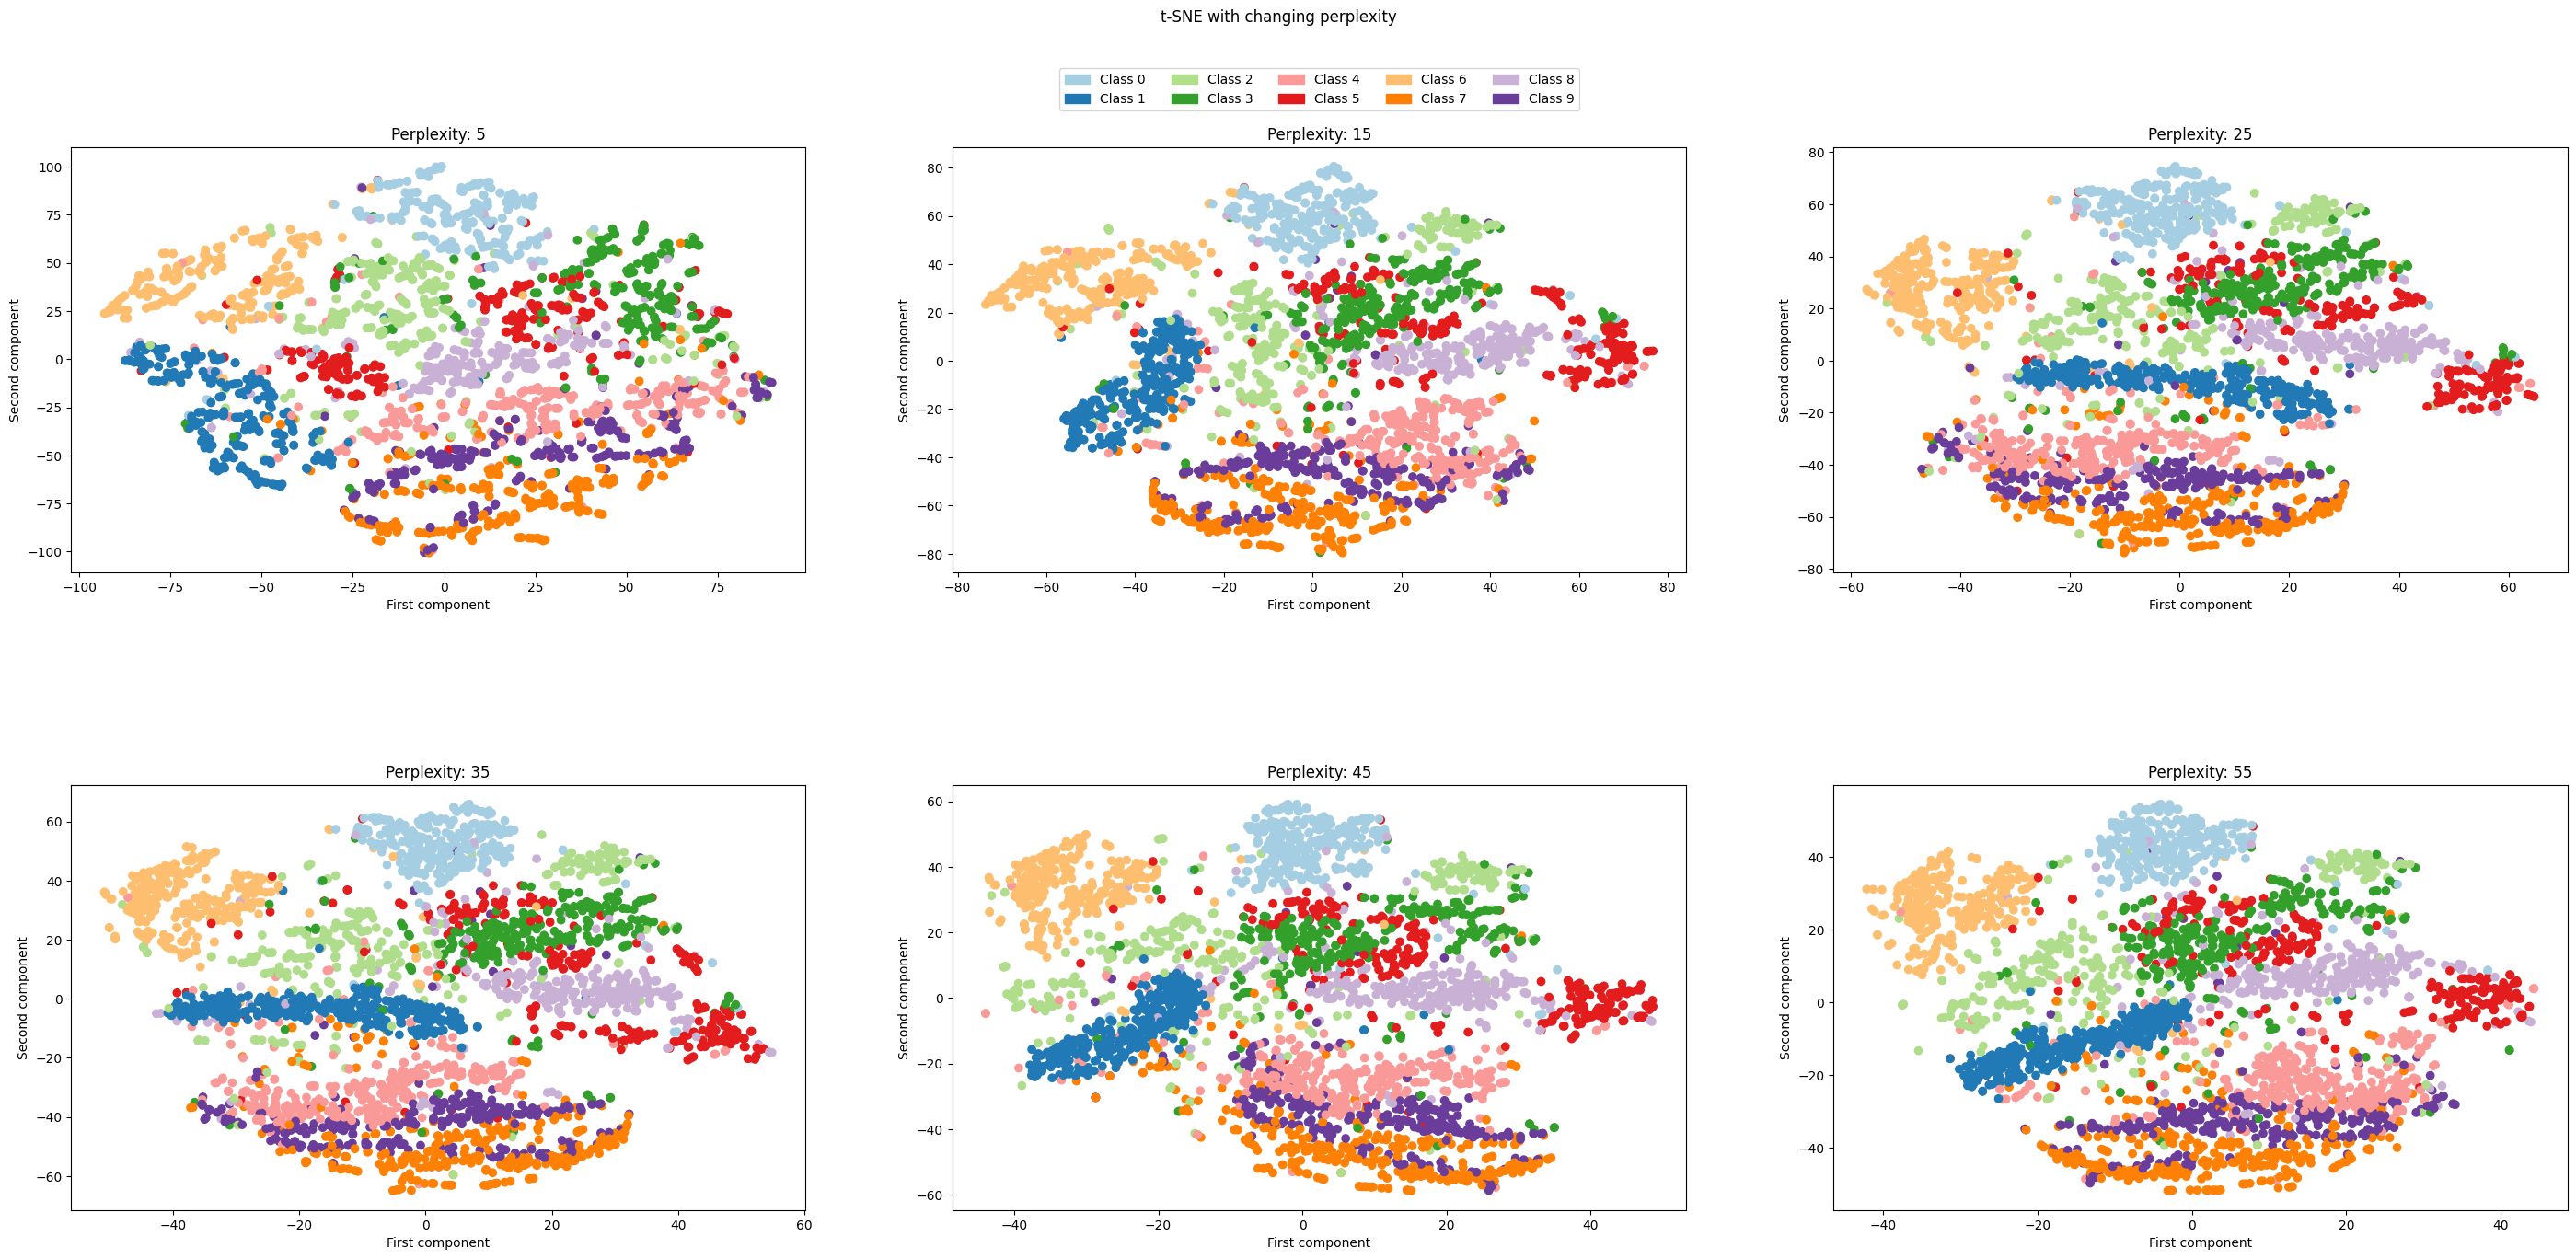

In [40]:
plt.figure(figsize=(35,15))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("t-SNE with changing perplexity")

# Define the labels and colors
labels = list(range(10))  # Assuming values are between 0 and 9
colors = plt.cm.Paired(range(10))
print(colors)
cmap_new = LinearSegmentedColormap.from_list("MyColours", colors)
# Create legend handles
handles = [mpatches.Patch(color=colors[i], label=f'Class {labels[i]}') for i in range(10)]

for i in range(len(perplexity)):
    tsne1 = [val[0] for val in TSNE_results[i]]
    tsne2 = [val[1] for val in TSNE_results[i]]

    ax = plt.subplot(2, 3, i + 1)# plt.subplot(2, 5, i + 1)
    scatter = ax.scatter(x=tsne1, y=tsne2, c=y_subset, cmap=cmap_new)
    ax.set_title(f"Perplexity: {perplexity[i]}")
    ax.set_xlabel("First component")
    ax.set_ylabel("Second component")

# Add the legend to the figure
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(-0.7, 2.7), ncol=5) # if you increase the number of plots, you need to change the anchor values


In [17]:
print(perplexity)

[ 5 15 25 35 45 55 65 75 85 95]


https://medium.com/@sachinsoni600517/mastering-t-sne-t-distributed-stochastic-neighbor-embedding-0e365ee898ea